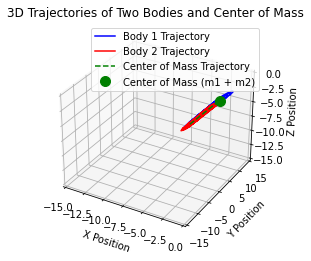

AttributeError: 'list' object has no attribute 'shape'

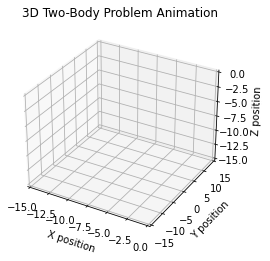

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
%matplotlib inline

# Parameters 
G = 0.1
m1 = 900
m2 = 1000

# Define right-hand side
def dAdt(t, A):
    x1 = A[0]
    vx1 = A[1]
    y1 = A[2]
    vy1 = A[3]
    z1 = A[4]
    vz1 = A[5]
    x2 = A[6]
    vx2 = A[7]
    y2 = A[8]
    vy2 = A[9]
    z2 = A[10]
    vz2 = A[11]
    
    # Define right hand side function
    dx1dt = vx1
    dvx1dt = -G * m2 * (x1 - x2) / ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(3/2)
    
    dy1dt = vy1
    dvy1dt = -G * m2 * (y1 - y2) / ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(3/2)
    
    dz1dt = vz1
    dvz1dt = -G * m2 * (z1 - z2) / ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(3/2)
    
    dx2dt = vx2
    dvx2dt = -G * m1 * (x2 - x1) / ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(3/2)
    
    dy2dt = vy2
    dvy2dt = -G * m1 * (y2 - y1) / ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(3/2)
    
    dz2dt = vz2
    dvz2dt = -G * m1 * (z2 - z1) / ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**(3/2)
    
    return [dx1dt, dvx1dt, dy1dt, dvy1dt, dz1dt, dvz1dt, dx2dt, dvx2dt, dy2dt, dvy2dt, dz2dt, dvz2dt]

# Time Discretization
N = int(1e2)
t_0 = 0
t_end = 40
t_span = np.linspace(t_0, t_end, N)

# Initial condition
x1_0, y1_0, z1_0, vx1_0, vy1_0, vz1_0 = 1, 1, 1, 2, -1, 3
x2_0, y2_0, z2_0, vx2_0, vy2_0, vz2_0 = -1, -1, -1, -2, 1, -3
A_0 = [x1_0, vx1_0, y1_0, vy1_0, z1_0, vz1_0, x2_0, vx2_0, y2_0, vy2_0, z2_0, vz2_0]

# Solve the initial value problem using solve_ivp
sol = solve_ivp(dAdt, [t_0, t_end], A_0, t_eval=t_span, method='BDF') 

# Extract time and solution
t = sol.t
x1, vx1, y1, vy1, z1, vz1 = sol.y[:6, :]
x2, vx2, y2, vy2, z2, vz2 = sol.y[6:, :]

# Calculate center of mass trajectory
x_cm = (m1 * x1 + m2 * x2) / (m1 + m2)
y_cm = (m1 * y1 + m2 * y2) / (m1 + m2)
z_cm = (m1 * z1 + m2 * z2) / (m1 + m2)

# Plotting the trajectories in 3D
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1, 'b-', label='Body 1 Trajectory')
ax.plot(x2, y2, z2, 'r-', label='Body 2 Trajectory')
ax.plot(x_cm, y_cm, z_cm, 'g--', label='Center of Mass Trajectory')
ax.plot(0, 0, 0, 'go', markersize=10, label='Center of Mass (m1 + m2)')
ax.set_title('3D Trajectories of Two Bodies and Center of Mass')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_xlim([-15, 0])
ax.set_ylim([-15, 15])
ax.set_zlim([-15, 0])
ax.legend()
ax.grid()
plt.show()

# Animation setup
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.set_xlim(-15, 0)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 0)
ax.set_title("3D Two-Body Problem Animation")
ax.set_xlabel("X position")
ax.set_ylabel("Y position")
ax.set_zlabel("Z position")

line1, = ax.plot([], [], [], 'bo', markersize=5)  
line2, = ax.plot([], [], [], 'ro', markersize=5)  
line_cm, = ax.plot([], [], [], 'go--', markersize=5)  

# Initialization function
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    line_cm.set_data([], [])
    line_cm.set_3d_properties([])
    return line1, line2, line_cm,

# Animation function
def animate(i):
    line1.set_data(x1[i:i+1], y1[i:i+1])  # Set data for line1
    line1.set_3d_properties(z1[i:i+1])     # Set 3D properties for line1
    
    line2.set_data(x2[i:i+1], y2[i:i+1])  # Set data for line2
    line2.set_3d_properties(z2[i:i+1])     # Set 3D properties for line2
    
    line_cm.set_data(x_cm[i:i+1], y_cm[i:i+1])  # Set data for center of mass
    line_cm.set_3d_properties(z_cm[i:i+1])        # Set 3D properties for center of mass
    
    return line1, line2, line_cm,

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True, interval=50)

plt.show()
HTML(ani.to_jshtml())
